In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('cardio_train.csv', sep=';', header=0)  # Replace 'your_dataset.csv' with the path to your dataset

# Convert 'cardio' column to categorical type
data['cardio'] = data['cardio'].astype('category')

# Function to plot comparison of positives vs negatives for categorical parameters
def plot_categorical_comparison(parameter):
    counts = data.groupby([parameter, 'cardio']).size().unstack()
    counts.plot(kind='bar', stacked=False)
    plt.title(f'{parameter.capitalize()} vs. Cardio')
    plt.xlabel(parameter.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Cardio')
    plt.show()

# Function to plot comparison of positives vs negatives for continuous parameters
def plot_continuous_comparison(parameter):
    plt.hist([data[data['cardio'] == 0][parameter], data[data['cardio'] == 1][parameter]], 
             bins=30, stacked=False, label=['Cardio=0', 'Cardio=1'])
    plt.title(f'{parameter.capitalize()} vs. Cardio')
    plt.xlabel(parameter.capitalize())
    plt.ylabel('Count')
    plt.legend()
    plt.show()

C:\Users\Mel-john Catanaoan\AppData\Local\Temp\ipykernel_39172\177342388.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([parameter, 'cardio']).size().unstack()


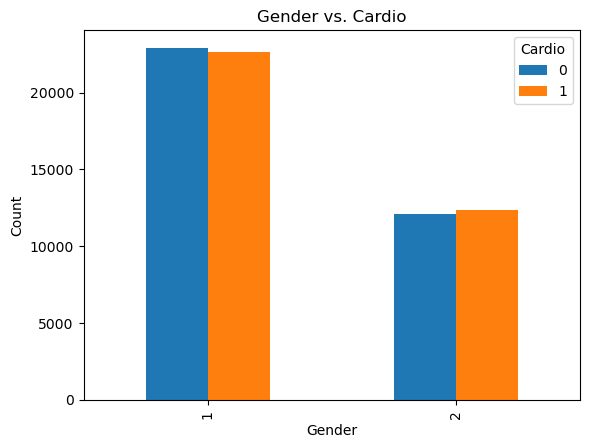

C:\Users\Mel-john Catanaoan\AppData\Local\Temp\ipykernel_39172\177342388.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([parameter, 'cardio']).size().unstack()


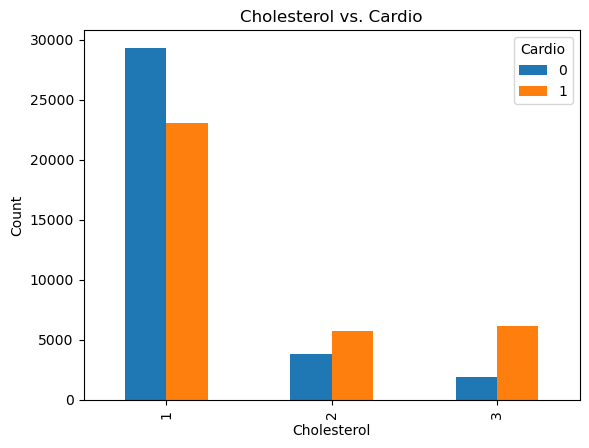

C:\Users\Mel-john Catanaoan\AppData\Local\Temp\ipykernel_39172\177342388.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([parameter, 'cardio']).size().unstack()


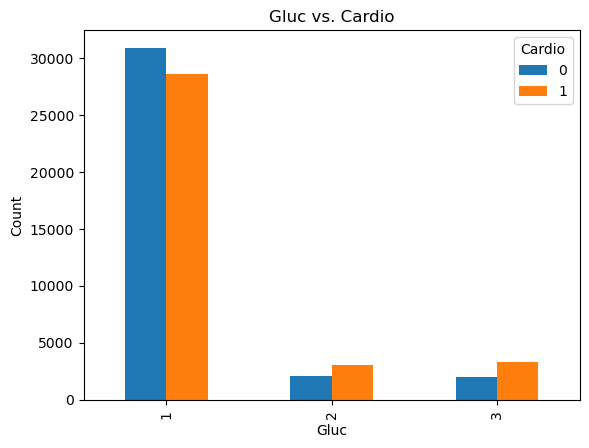

C:\Users\Mel-john Catanaoan\AppData\Local\Temp\ipykernel_39172\177342388.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([parameter, 'cardio']).size().unstack()


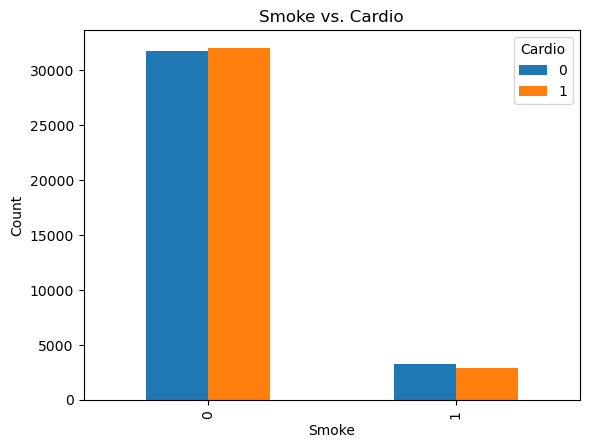

C:\Users\Mel-john Catanaoan\AppData\Local\Temp\ipykernel_39172\177342388.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([parameter, 'cardio']).size().unstack()


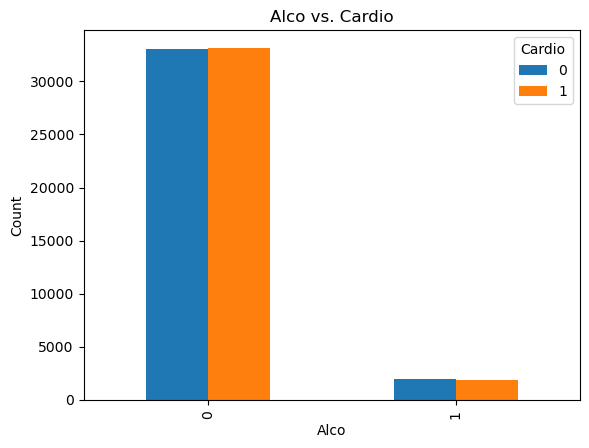

C:\Users\Mel-john Catanaoan\AppData\Local\Temp\ipykernel_39172\177342388.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([parameter, 'cardio']).size().unstack()


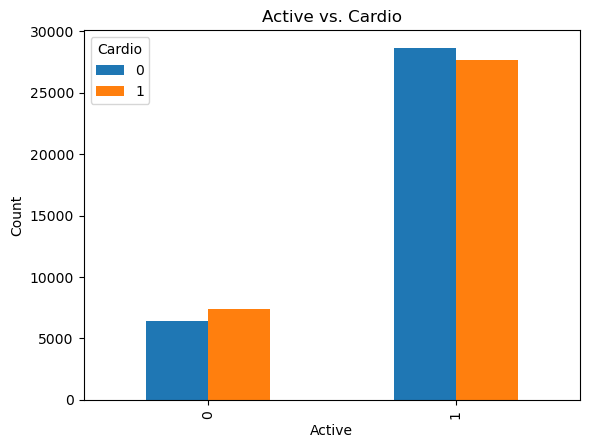

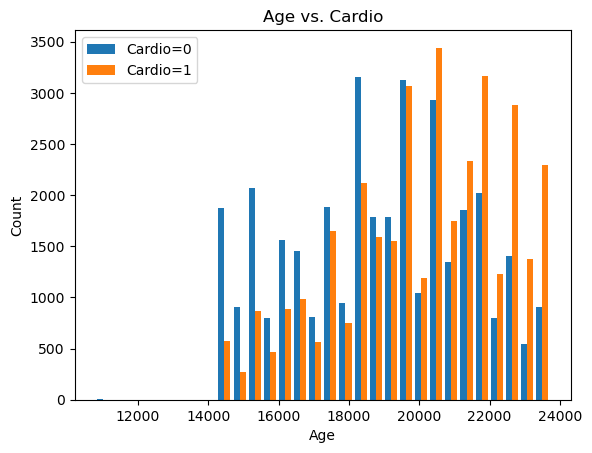

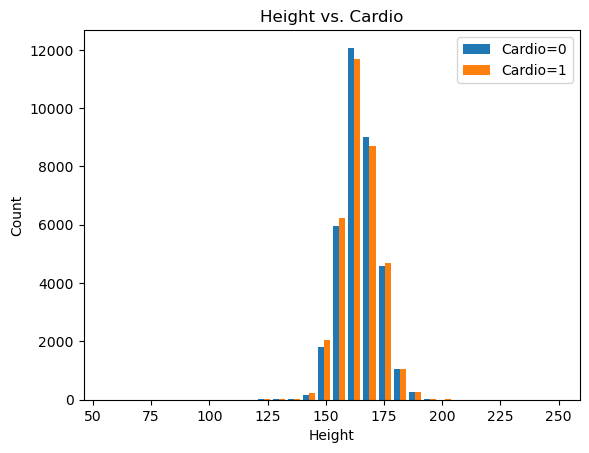

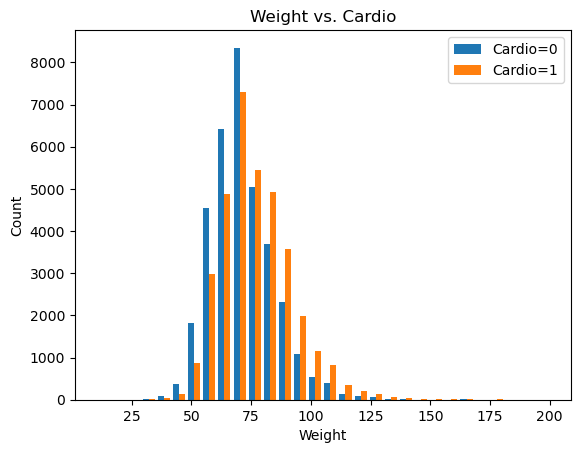

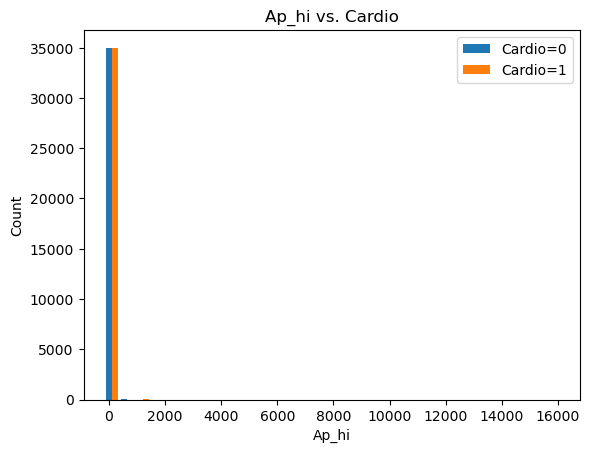

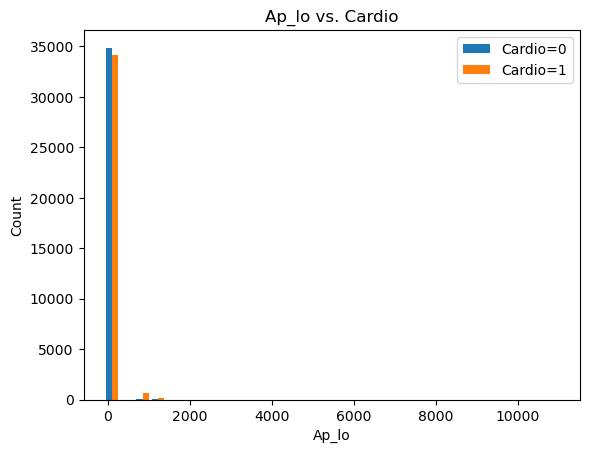

In [26]:
# Plot categorical parameters
categorical_parameters = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
for param in categorical_parameters:
    plot_categorical_comparison(param)

# Plot continuous parameters
continuous_parameters = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for param in continuous_parameters:
    plot_continuous_comparison(param)

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Function to prepare data with specified columns to include
def prepare_data(data, include_columns):
    X = data[include_columns]
    y = data['cardio']
    return X, y

# Specify the columns to include (example)
include_columns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# include_columns = ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Prepare the data
X, y = prepare_data(data, include_columns)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Validate SVM model
y_val_pred_svm = svm_model.predict(X_val)
print("SVM Model Validation Results")
print(classification_report(y_val, y_val_pred_svm))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_svm))

# Train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Validate Logistic Regression model
y_val_pred_log_reg = log_reg_model.predict(X_val)
print("\nLogistic Regression Model Validation Results")
print(classification_report(y_val, y_val_pred_log_reg))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_log_reg))

# Evaluate on test set
print("\nEvaluating on Test Set")

# SVM model
y_test_pred_svm = svm_model.predict(X_test)
print("SVM Model Test Results")
print(classification_report(y_test, y_test_pred_svm))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_svm))

# Logistic Regression model
y_test_pred_log_reg = log_reg_model.predict(X_test)
print("\nLogistic Regression Model Test Results")
print(classification_report(y_test, y_test_pred_log_reg))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_log_reg))


SVM Model Validation Results
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      7004
           1       0.76      0.64      0.69      6996

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000

Validation Accuracy: 0.7202857142857143

Logistic Regression Model Validation Results
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.68      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

Validation Accuracy: 0.7138571428571429

Evaluating on Test Set
SVM Model Test Results
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      7004
           1       0.76      0.64  

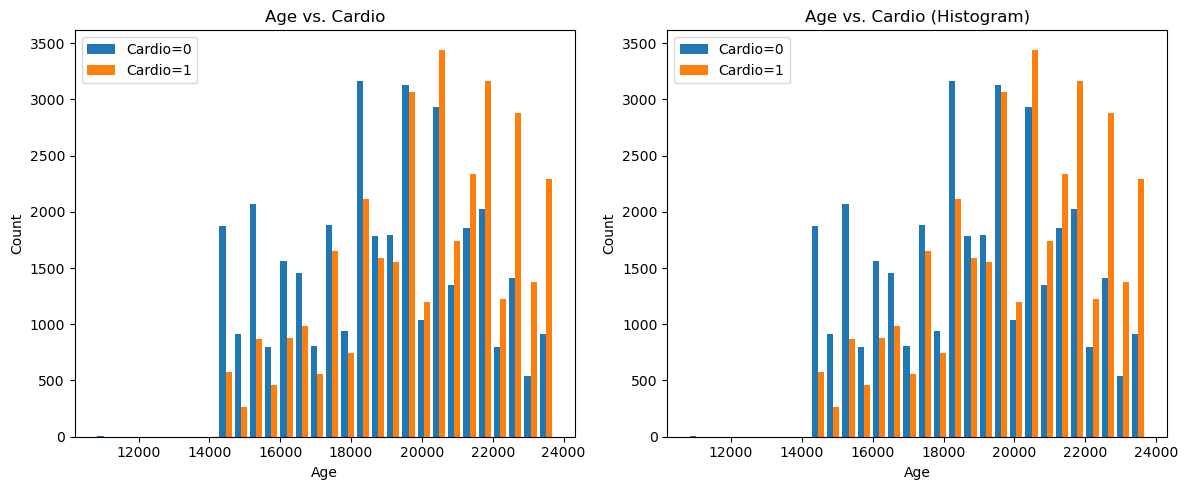

C:\Users\Mel-john Catanaoan\AppData\Local\Temp\ipykernel_39172\2042147100.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([parameter, 'cardio']).size().unstack()


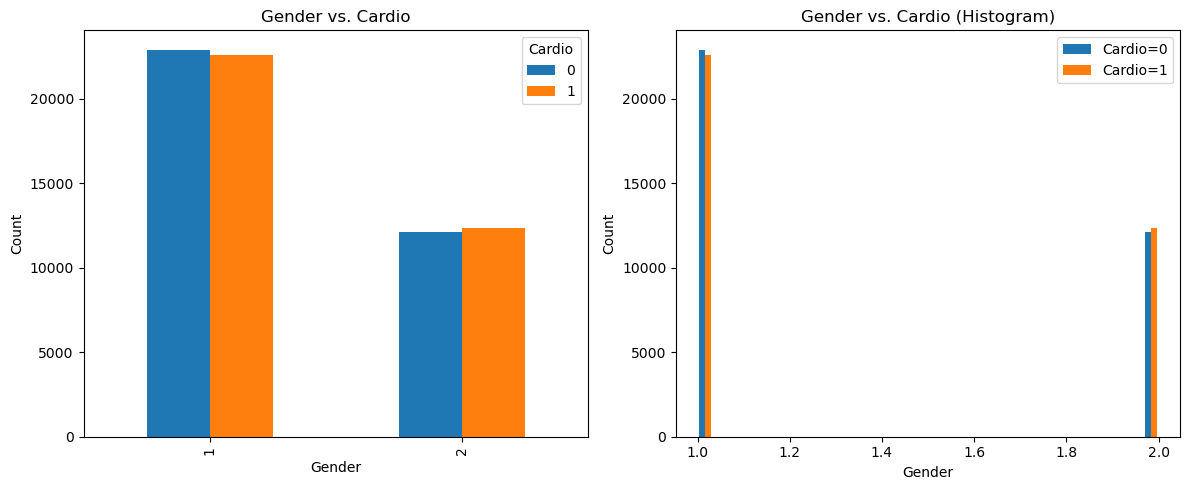

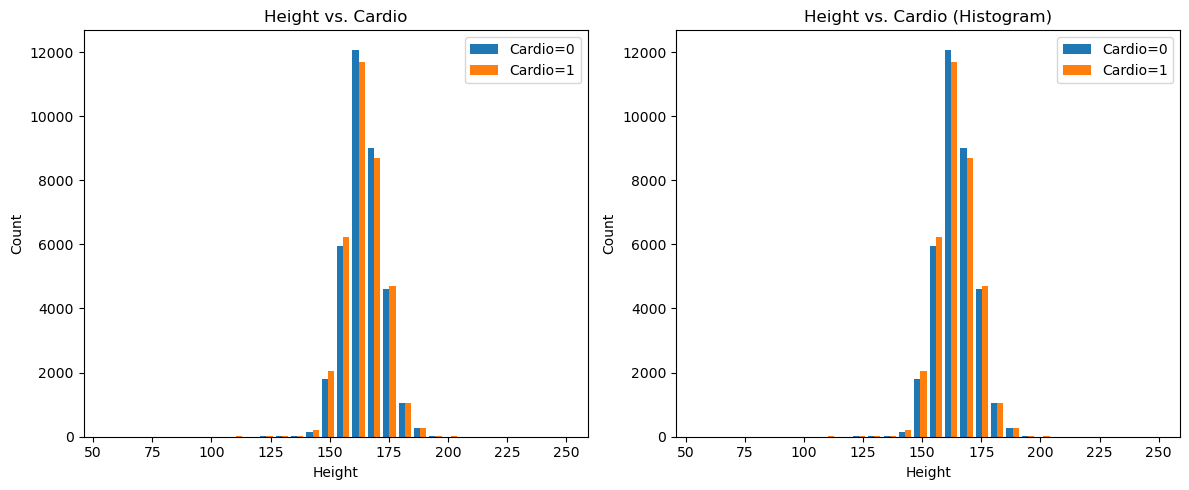

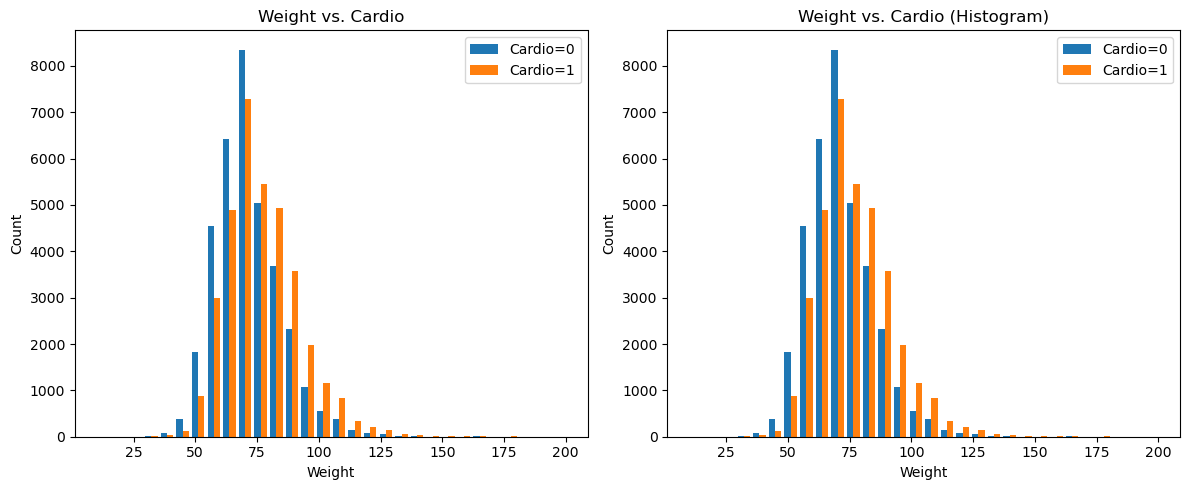

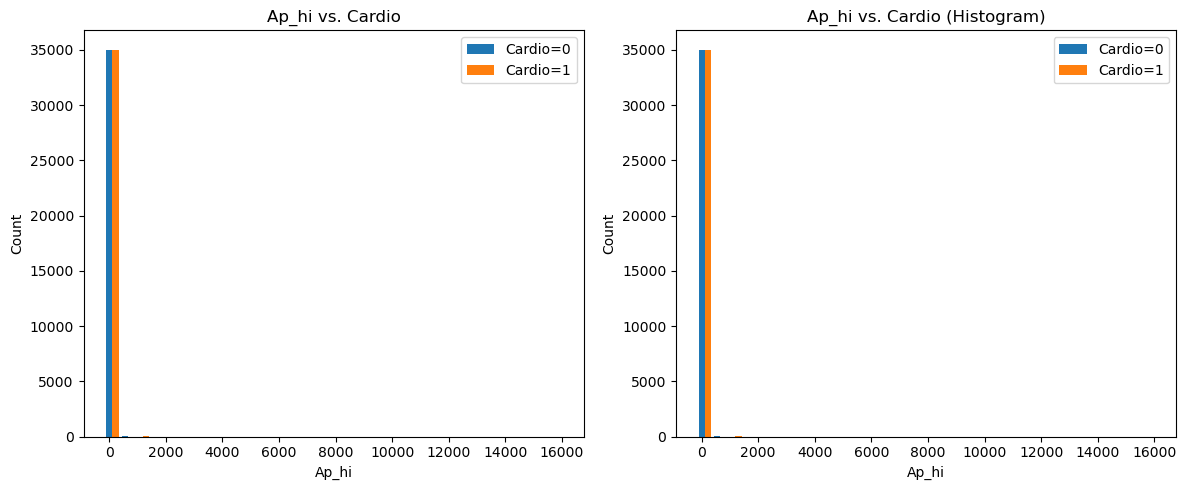

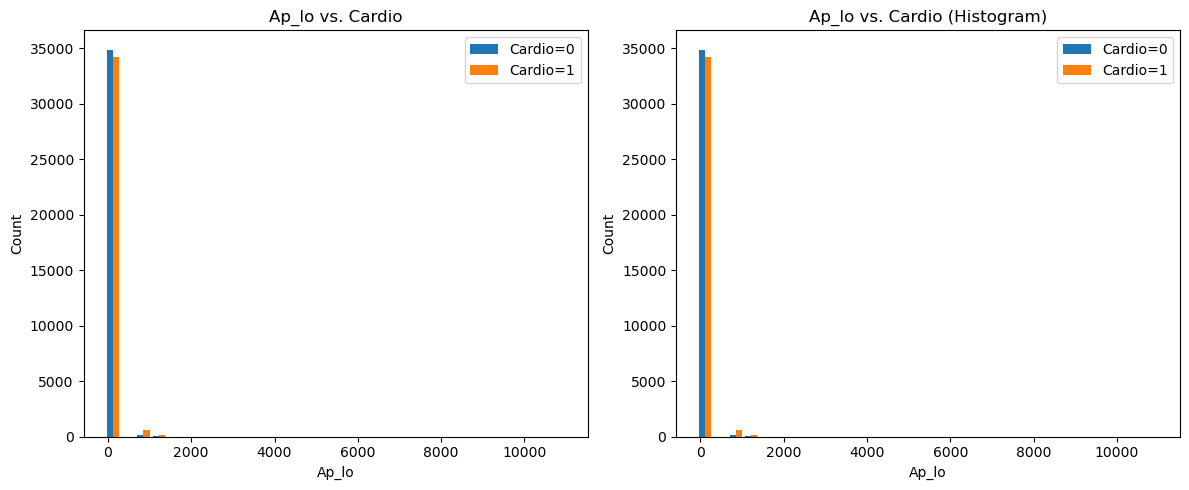

C:\Users\Mel-john Catanaoan\AppData\Local\Temp\ipykernel_39172\2042147100.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([parameter, 'cardio']).size().unstack()


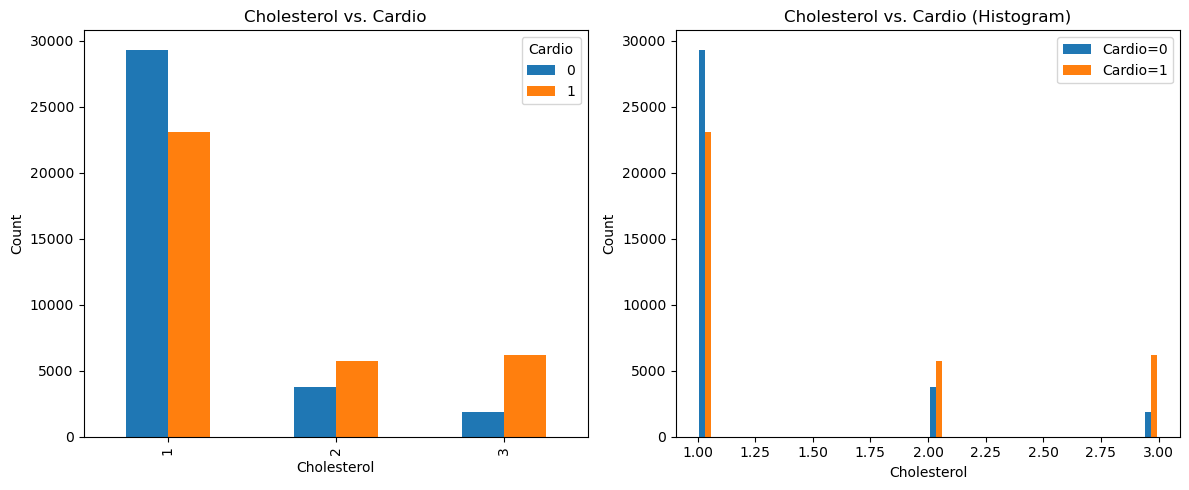

C:\Users\Mel-john Catanaoan\AppData\Local\Temp\ipykernel_39172\2042147100.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([parameter, 'cardio']).size().unstack()


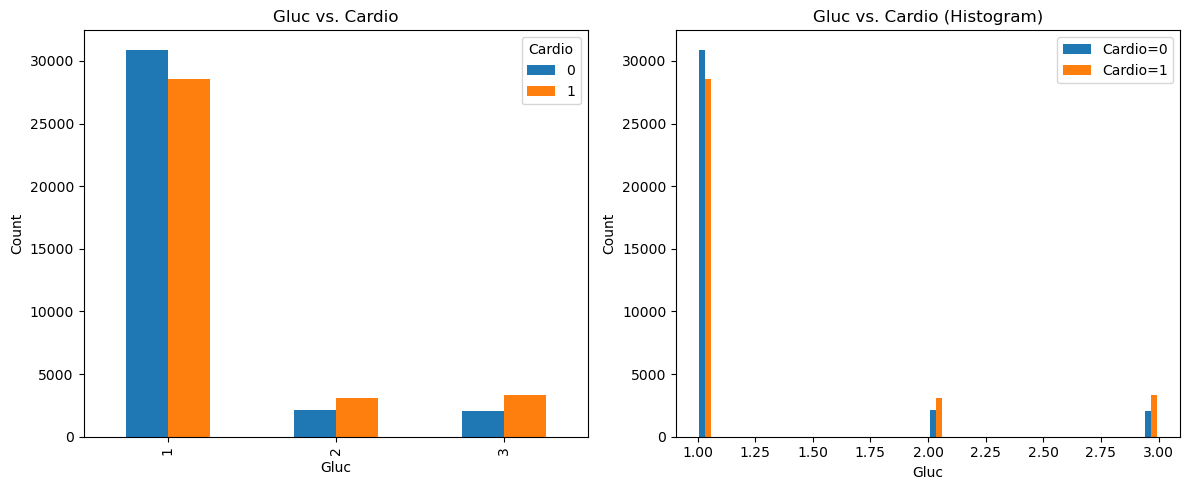

C:\Users\Mel-john Catanaoan\AppData\Local\Temp\ipykernel_39172\2042147100.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([parameter, 'cardio']).size().unstack()


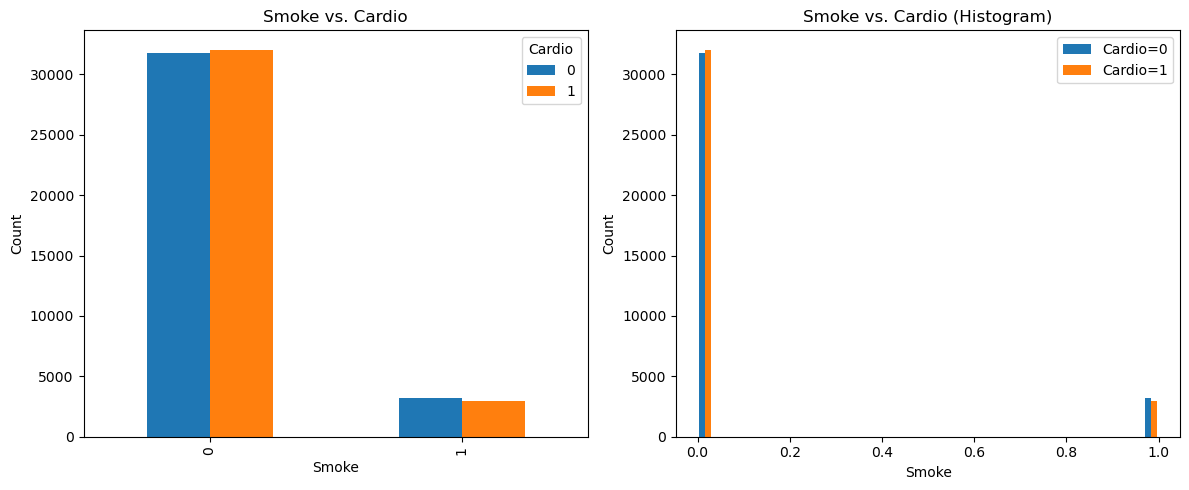

C:\Users\Mel-john Catanaoan\AppData\Local\Temp\ipykernel_39172\2042147100.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([parameter, 'cardio']).size().unstack()


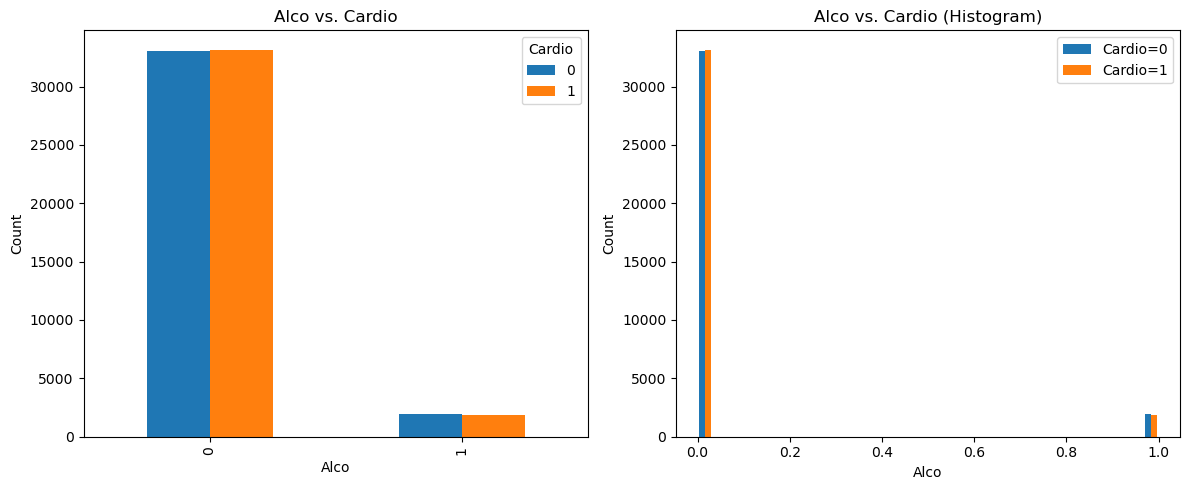

C:\Users\Mel-john Catanaoan\AppData\Local\Temp\ipykernel_39172\2042147100.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([parameter, 'cardio']).size().unstack()


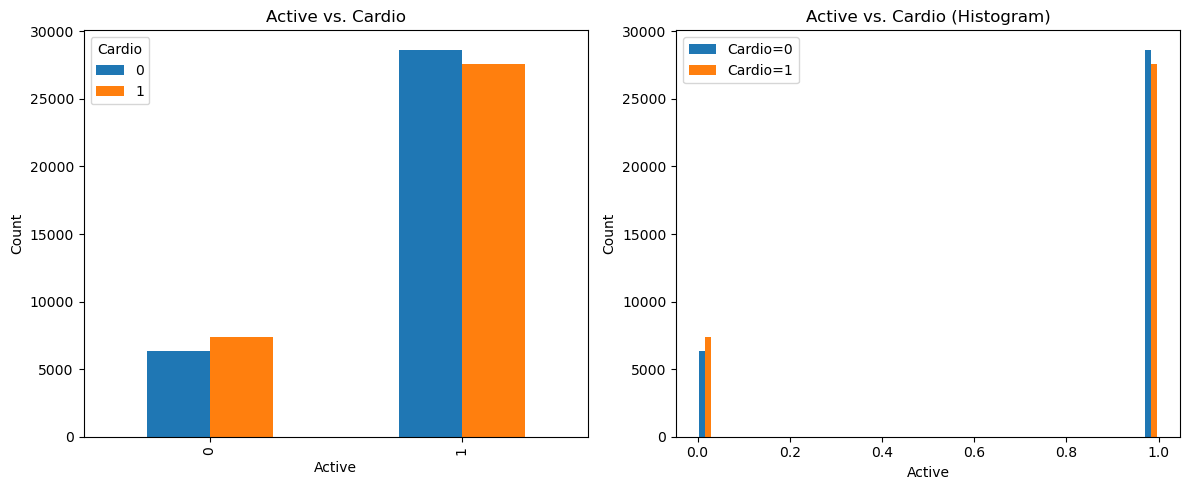

In [29]:
# Plot both comparisons in a single figure for each parameter
def plot_combined_comparison(parameter, is_categorical):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    if is_categorical:
        counts = data.groupby([parameter, 'cardio']).size().unstack()
        counts.plot(kind='bar', stacked=False, ax=ax[0])
        ax[0].set_title(f'{parameter.capitalize()} vs. Cardio')
        ax[0].set_xlabel(parameter.capitalize())
        ax[0].set_ylabel('Count')
        ax[0].legend(title='Cardio')
    else:
        ax[0].hist([data[data['cardio'] == 0][parameter], data[data['cardio'] == 1][parameter]], 
                   bins=30, stacked=False, label=['Cardio=0', 'Cardio=1'])
        ax[0].set_title(f'{parameter.capitalize()} vs. Cardio')
        ax[0].set_xlabel(parameter.capitalize())
        ax[0].set_ylabel('Count')
        ax[0].legend()
    
    ax[1].hist([data[data['cardio'] == 0][parameter], data[data['cardio'] == 1][parameter]], 
               bins=30, stacked=False, label=['Cardio=0', 'Cardio=1'])
    ax[1].set_title(f'{parameter.capitalize()} vs. Cardio (Histogram)')
    ax[1].set_xlabel(parameter.capitalize())
    ax[1].set_ylabel('Count')
    ax[1].legend()
    
    plt.tight_layout()
    plt.show()

# Specify which parameters are categorical
categorical_parameters = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
continuous_parameters = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Plot combined comparisons for all parameters
for param in include_columns:
    if param in categorical_parameters:
        plot_combined_comparison(param, is_categorical=True)
    else:
        plot_combined_comparison(param, is_categorical=False)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Function to prepare data with specified columns to include
def prepare_data(data, include_columns):
    X = data[include_columns]
    y = data['cardio']
    return X, y

# Specify the columns to include (example)
include_columns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Prepare the data
X, y = prepare_data(data, include_columns)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    print(f"\n{model_name} Model Validation Results")
    print(classification_report(y_val, y_val_pred))
    print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
    return model

# SVM model
svm_model = SVC(kernel='linear')
svm_model = train_and_evaluate_model(svm_model, "SVM")

# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model = train_and_evaluate_model(log_reg_model, "Logistic Regression")

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model = train_and_evaluate_model(rf_model, "Random Forest")

# K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model = train_and_evaluate_model(knn_model, "K-Nearest Neighbors")

# Evaluate all models on the test set
print("\nEvaluating on Test Set")

def evaluate_on_test_set(model, model_name):
    y_test_pred = model.predict(X_test)
    print(f"\n{model_name} Model Test Results")
    print(classification_report(y_test, y_test_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

evaluate_on_test_set(svm_model, "SVM")
evaluate_on_test_set(log_reg_model, "Logistic Regression")
evaluate_on_test_set(rf_model, "Random Forest")
evaluate_on_test_set(knn_model, "K-Nearest Neighbors")


SVM Model Validation Results
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      7004
           1       0.76      0.64      0.69      6996

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000

Validation Accuracy: 0.7202857142857143

Logistic Regression Model Validation Results
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.68      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

Validation Accuracy: 0.7138571428571429

Random Forest Model Validation Results
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      7004
           1       0.72      0.70      0.